# Problem Statement

Sales Prediction for Big Mart Outlets:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

# Hypothesis generation based on problem statement

1.Item Identifier & Outlet identifier have no much more significance on outlet sales.
2.Item weight might effect a sales of the product.
3.Sales of the product may be depends on the items fat content
4.Item_Visibility of a particular product may be have more sale than other products.
5.Item type could have an effect on the sales.
6.Item_MRP have more significxance in outlet sales.
7.Outlet establishment year have more lead significance in sales.
8.Size of the stores could have an effect on the item sales at a particular store.
9.Location of the stores might depends on the Item outlet sales.
10.Supermarkets have more sales than others.

In [1]:
#import all necessary libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the datas
train= pd.read_csv('Train.csv')
test= pd.read_csv('Test.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.shape

(8523, 12)

In [7]:
test.shape

(5681, 11)

# Exploratory Data Analysis for both train and test data

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [13]:
# Checking any Null values in train and test data

In [14]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
#to check duplicated rows
duplicates=train[train.duplicated()]
duplicates

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [17]:
#to check duplicated rows
duplicates=test[test.duplicated()]
duplicates

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


# Univariate Analysis

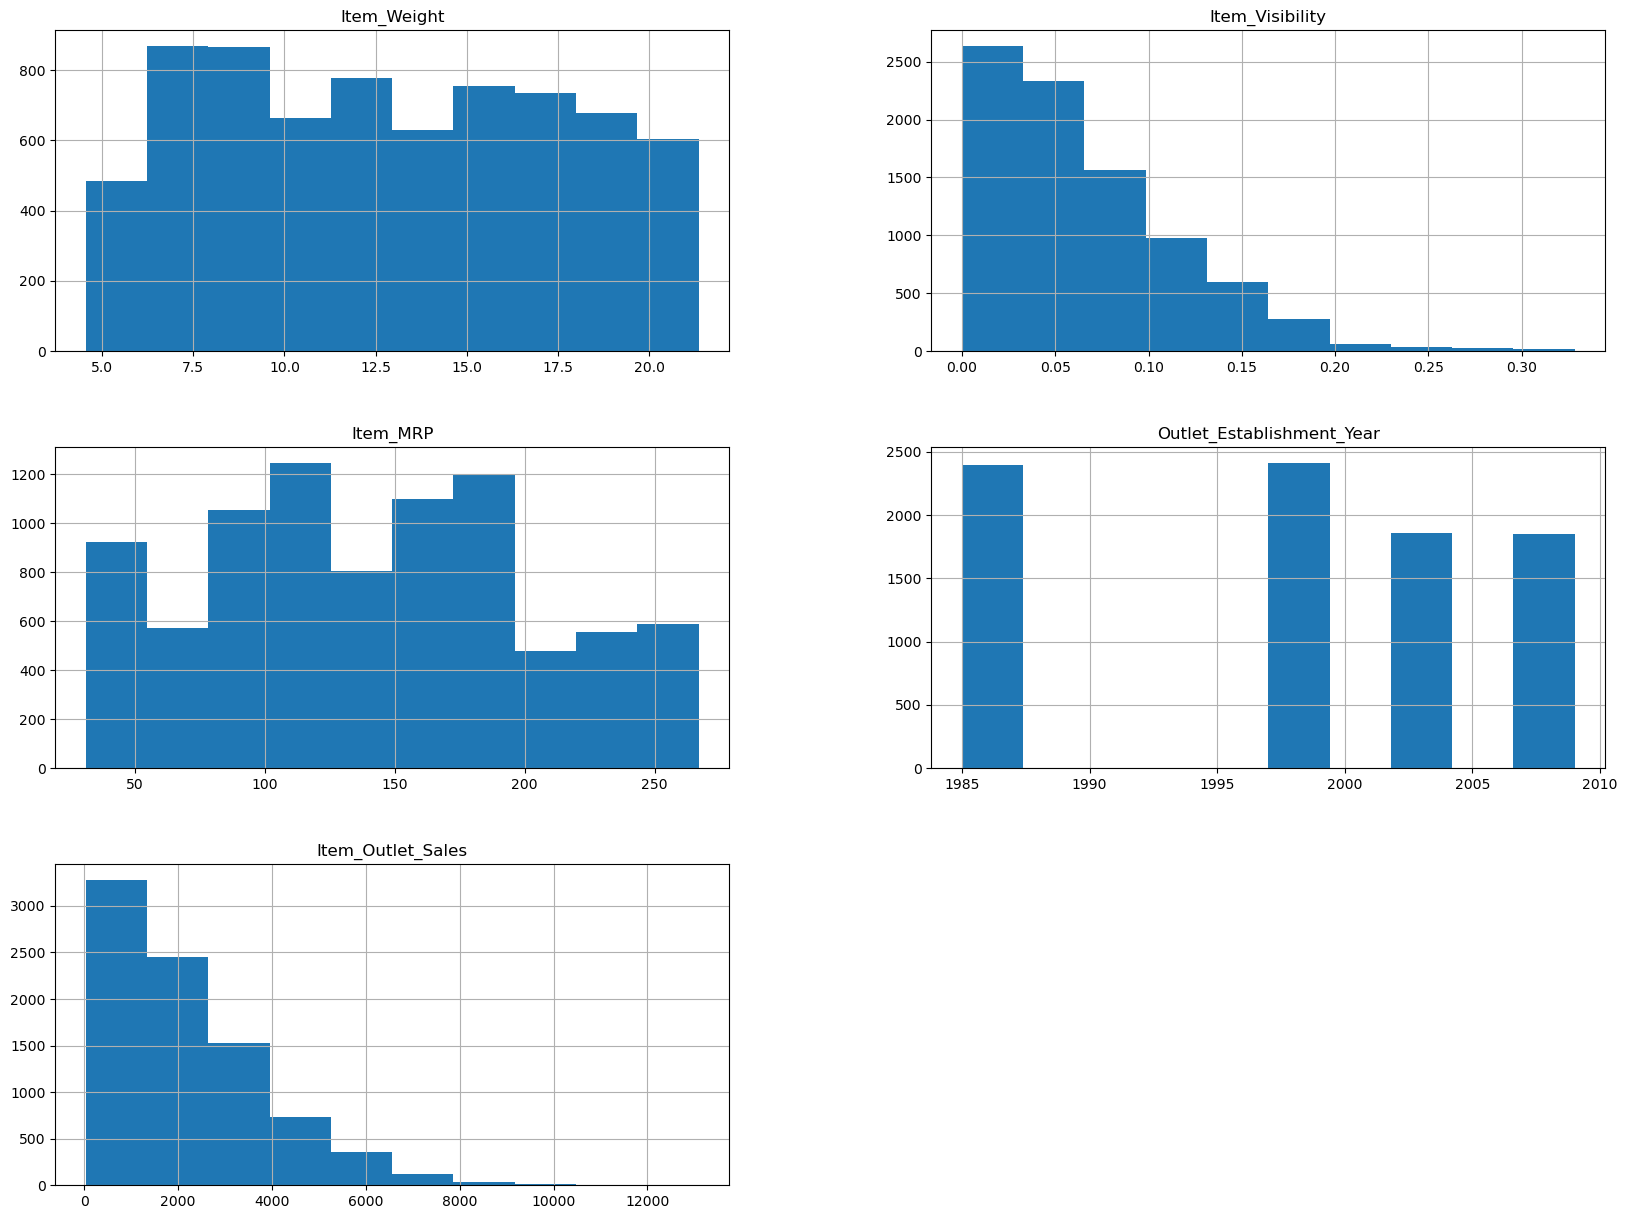

In [18]:
freqgraph=train.select_dtypes(include=['float','int','object'])
freqgraph.hist(figsize=(20,15))
plt.show()

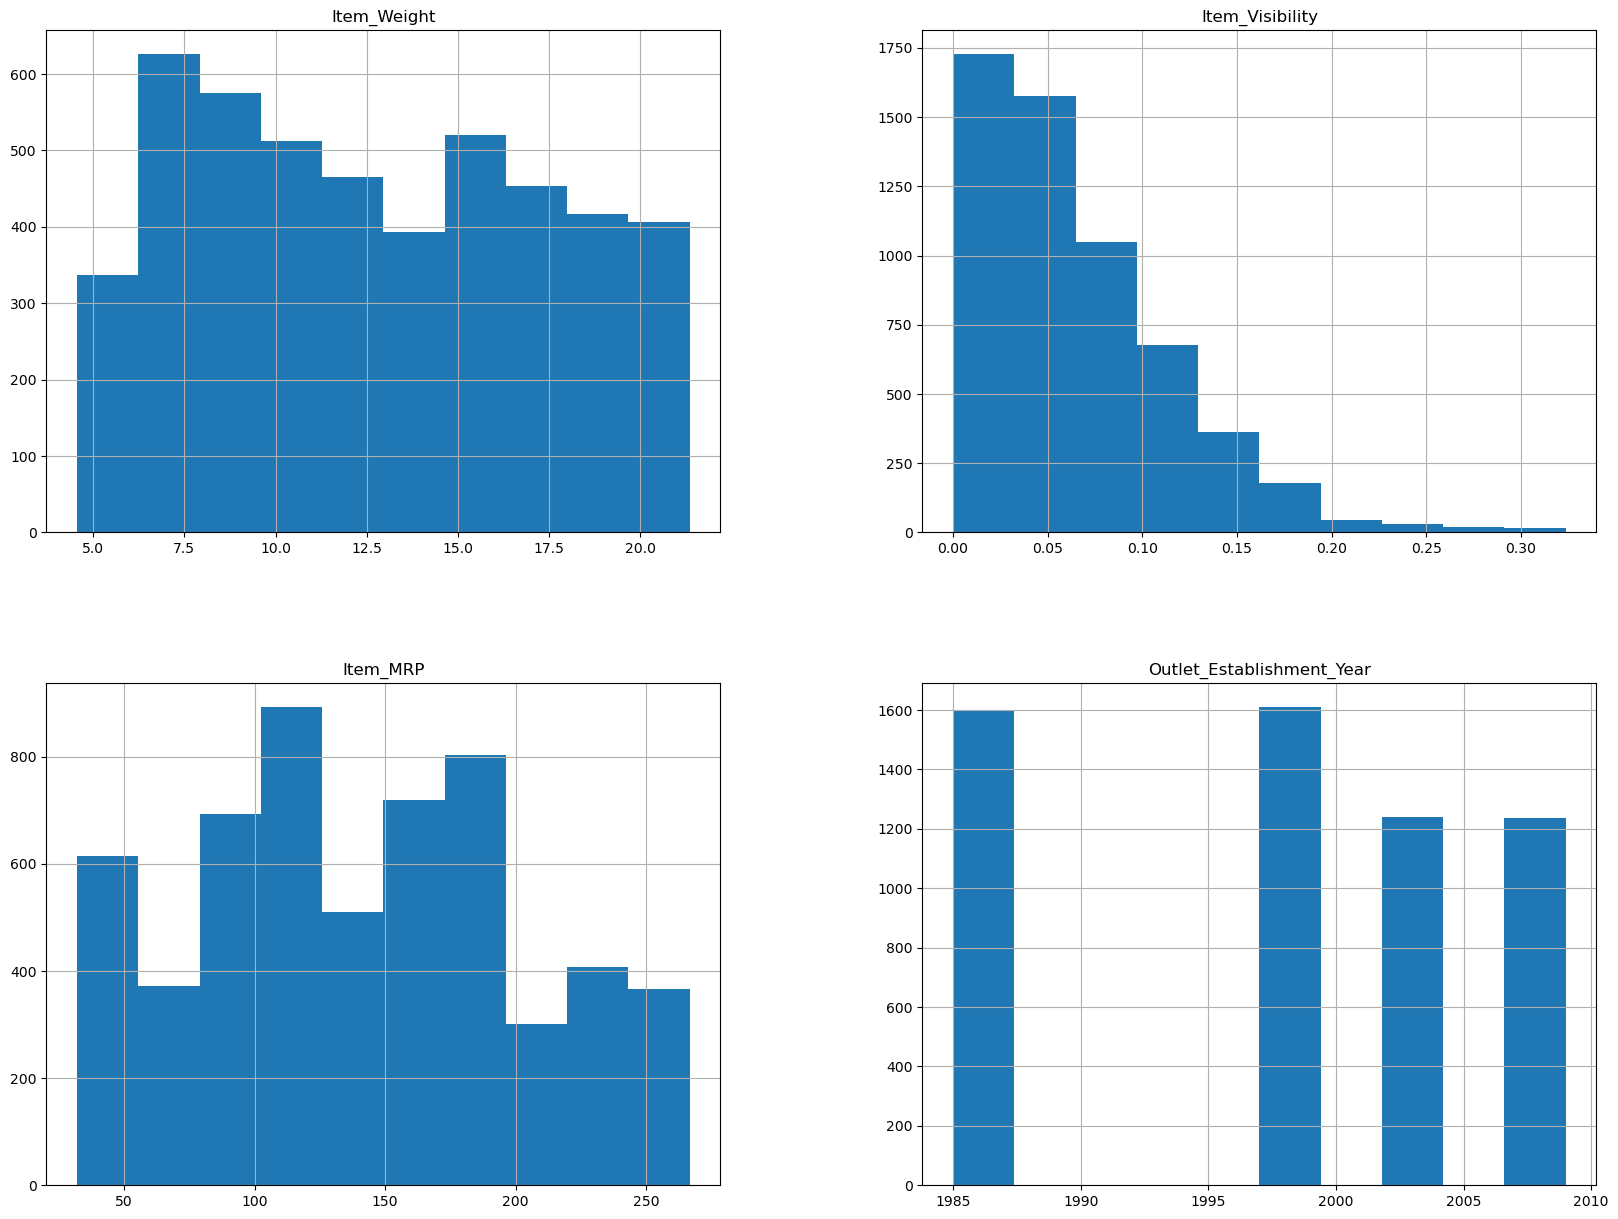

In [19]:
freqgraph=test.select_dtypes(include=['float','int','object'])
freqgraph.hist(figsize=(20,15))
plt.show()

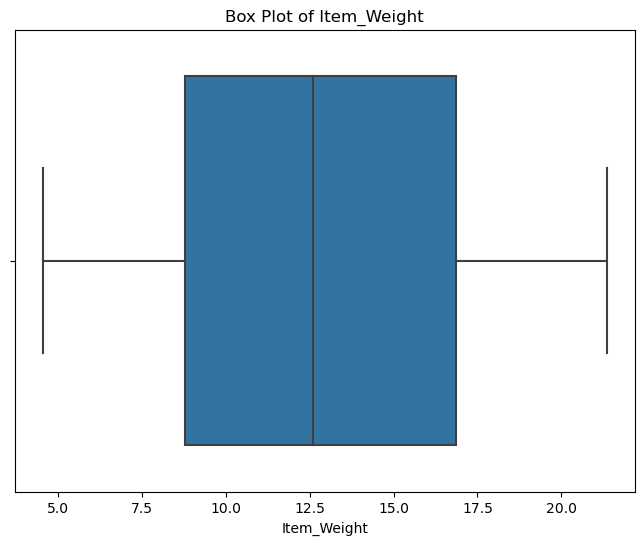

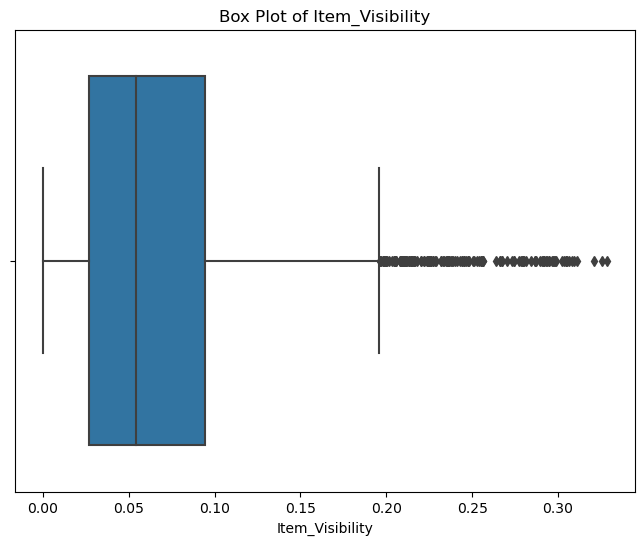

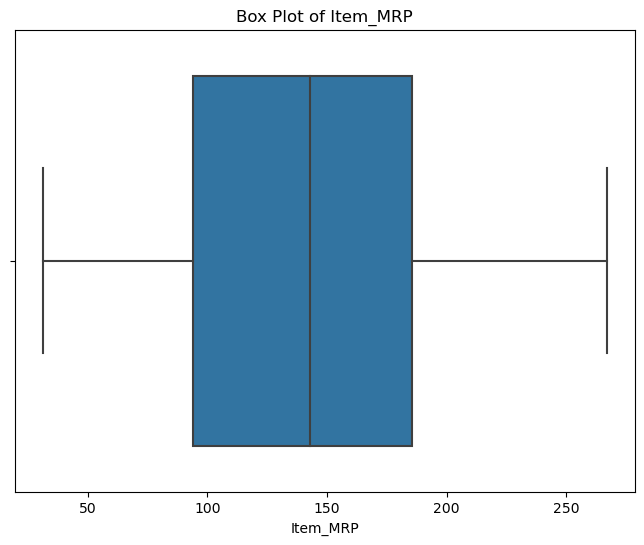

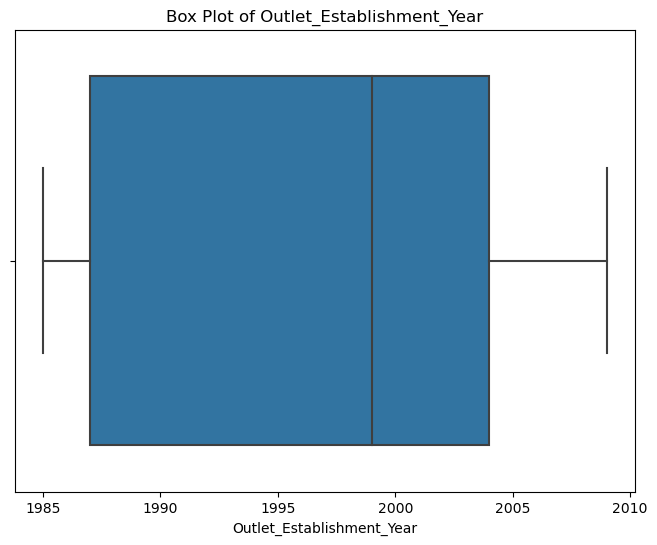

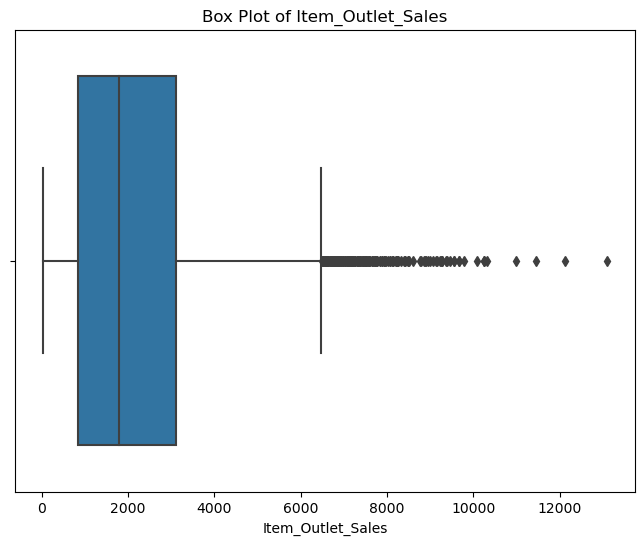

In [20]:
# Select numeric columns for box plots
numeric_columns =train.select_dtypes(include=['float64', 'int64']).columns

# Plot box plot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train[column].dropna())
    plt.title('Box Plot of ' + column)
    plt.xlabel(column)
    plt.show()

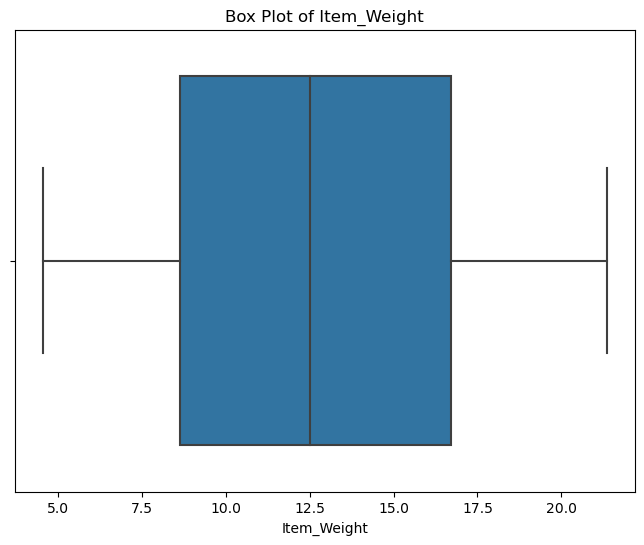

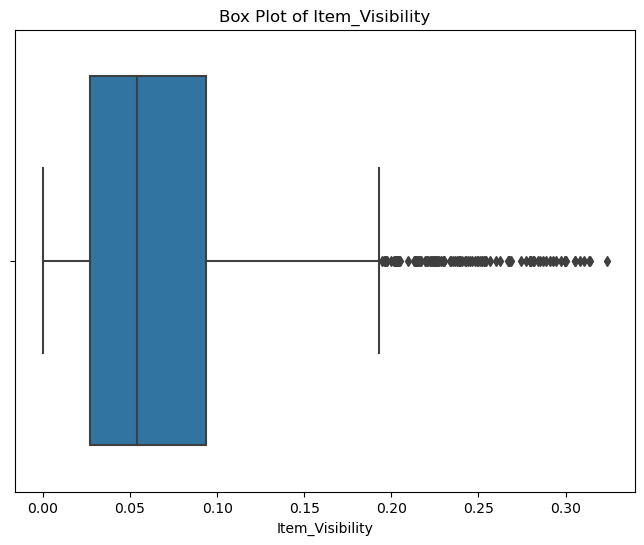

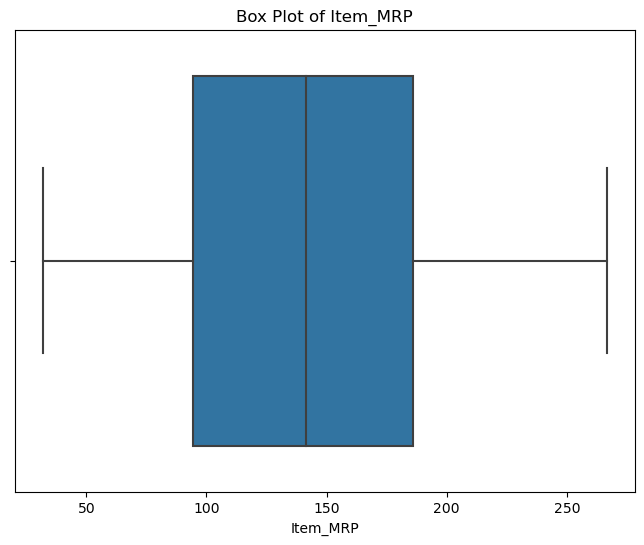

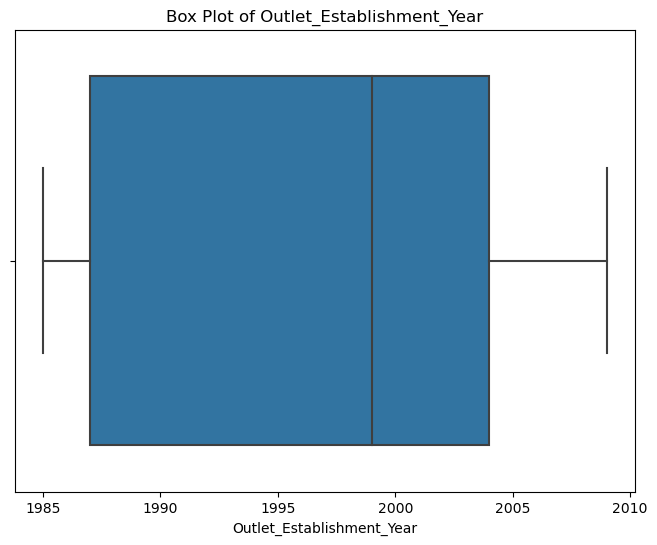

In [21]:
# Select numeric columns for box plots
numeric_columns =test.select_dtypes(include=['float64', 'int64']).columns

# Plot box plot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=test[column].dropna())
    plt.title('Box Plot of ' + column)
    plt.xlabel(column)
    plt.show()

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

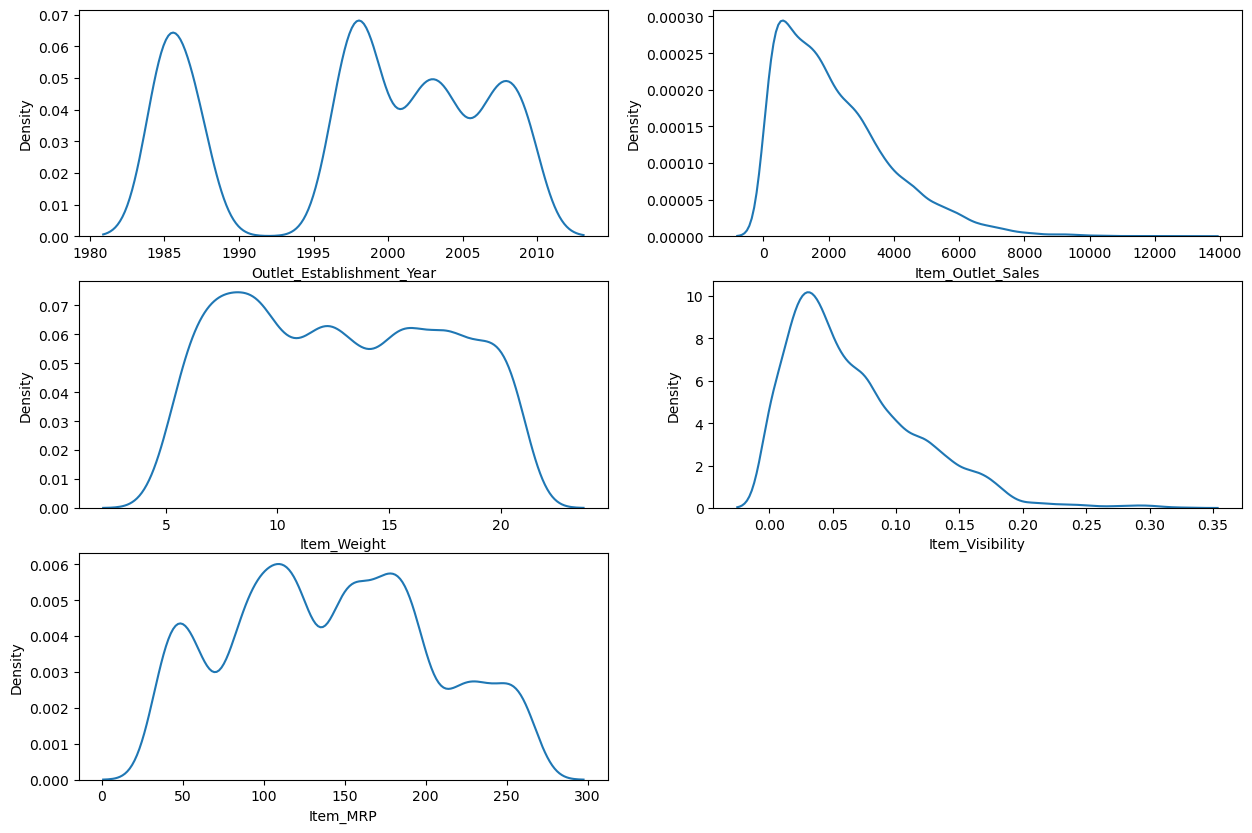

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.kdeplot(x='Outlet_Establishment_Year',data=train,palette='Set2')
plt.subplot(3,2,2)
sns.kdeplot(x='Item_Outlet_Sales',data=train,palette='Set2')
plt.subplot(3,2,3)
sns.kdeplot(x='Item_Weight',data=train,palette='Set2')
plt.subplot(3,2,4)
sns.kdeplot(x='Item_Visibility',data=train,palette='Set2')
plt.subplot(3,2,5)
sns.kdeplot(x='Item_MRP',data=train,palette='Set2')

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

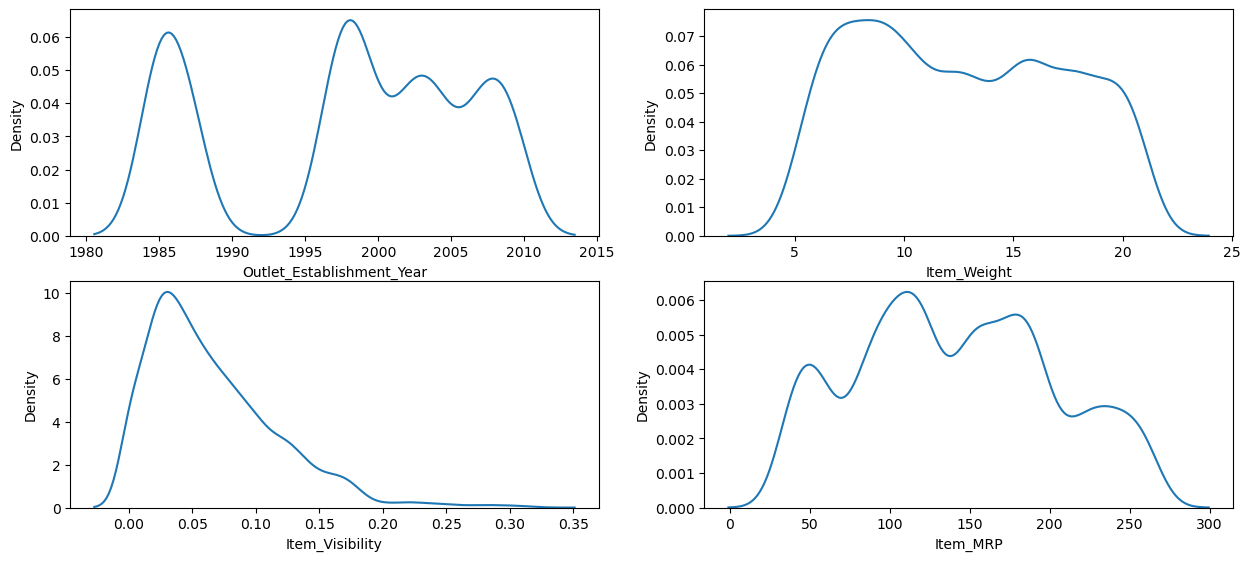

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.kdeplot(x='Outlet_Establishment_Year',data=test,palette='Set2')
plt.subplot(3,2,2)
sns.kdeplot(x='Item_Weight',data=test,palette='Set2')
plt.subplot(3,2,3)
sns.kdeplot(x='Item_Visibility',data=test,palette='Set2')
plt.subplot(3,2,4)
sns.kdeplot(x='Item_MRP',data=test,palette='Set2')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

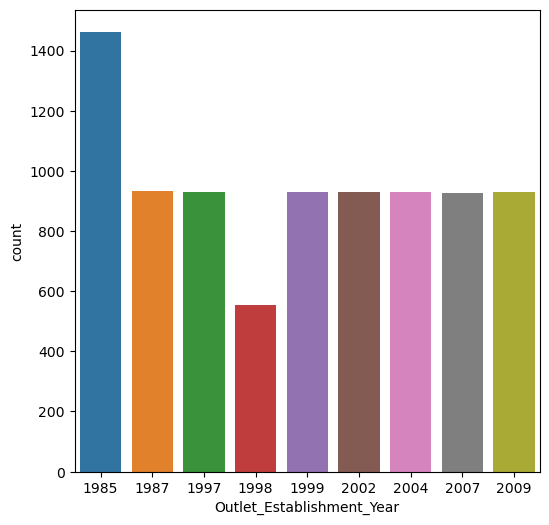

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

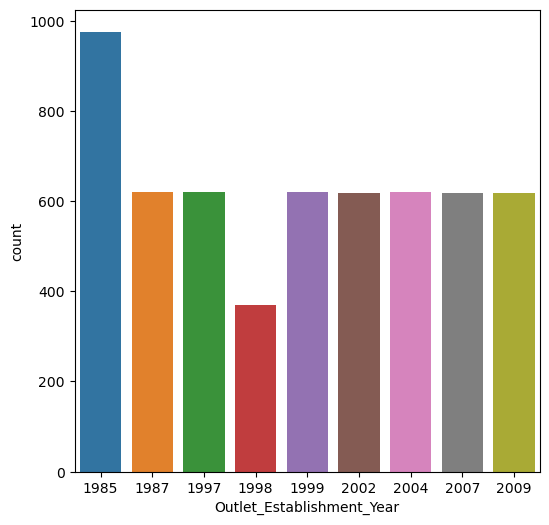

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=test)

Inference: 
    From train and test data, the outlet established in 1985 has more count than others .its almost 1450 around.In 1998 the outlet frequency is comapartively low.and other establisher year outlet have same count around 950 above.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

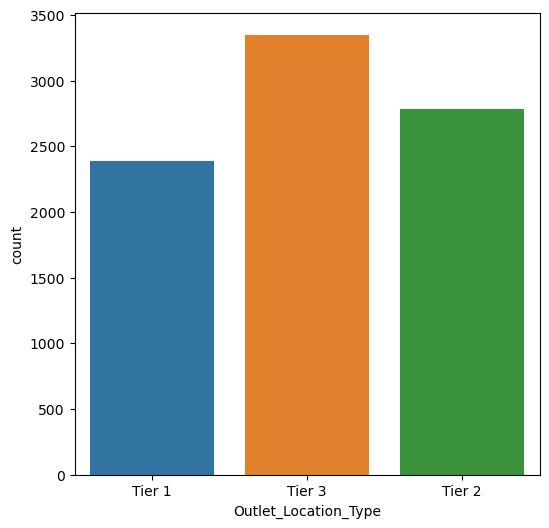

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

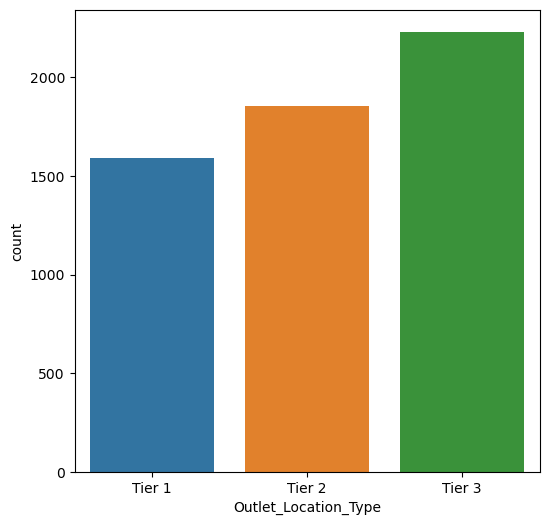

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data=test)

Inference:
    From train and test data we can see that, Tier 3 have most count then tier 2 and for last tier1

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

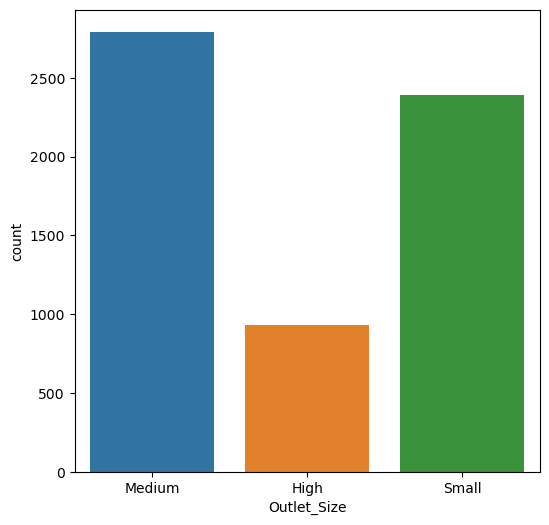

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

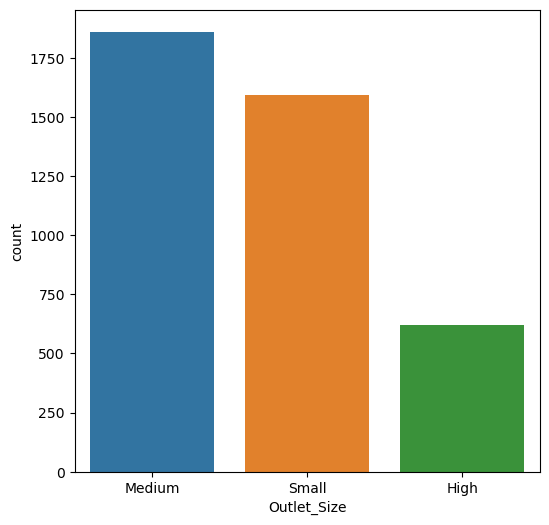

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=test)

Inference:
    From this analysis, both train and test data have Medium size outlet's count is high.
    Then small sized and last High size outlets 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

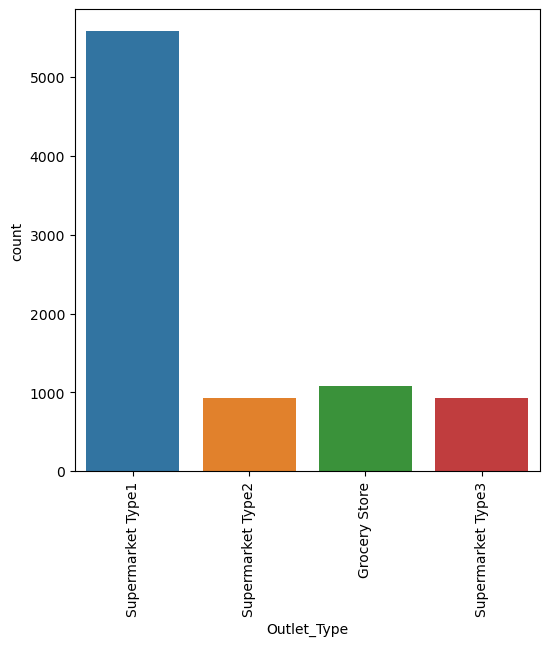

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type',data=train)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Grocery Store'),
  Text(2, 0, 'Supermarket Type3'),
  Text(3, 0, 'Supermarket Type2')])

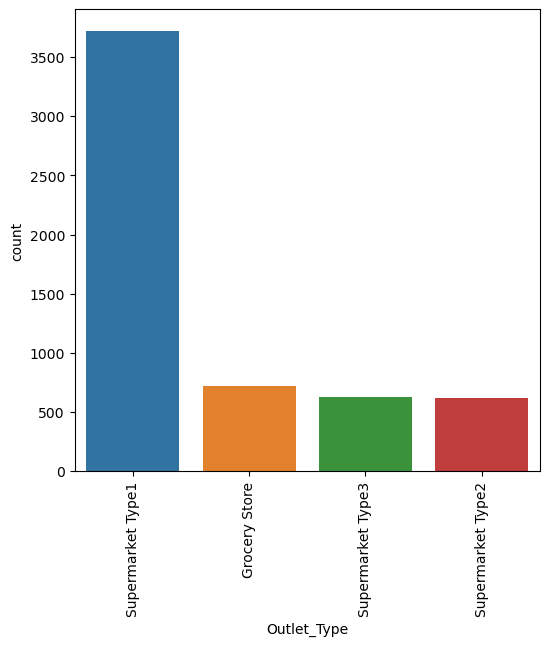

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type',data=test)
plt.xticks(rotation=90)

Inference:
    Here Supermarket type1 store have more significant count compared to others.
    Grocery store have secong highest count

# Bivariate Analysis

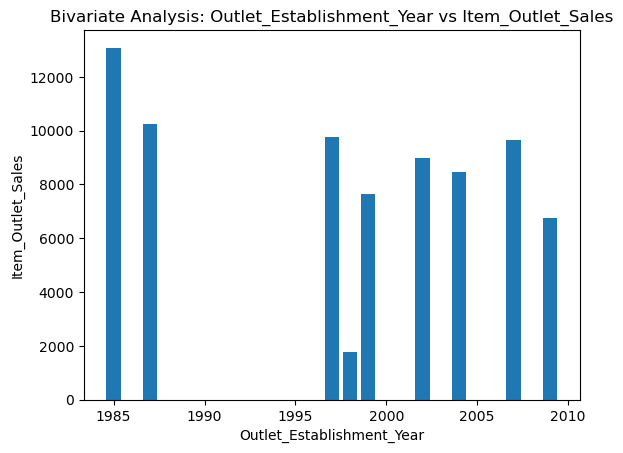

In [32]:
# Create a bar plot
plt.bar(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'])

# Set the title and labels
plt.title('Bivariate Analysis: Outlet_Establishment_Year vs Item_Outlet_Sales')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
# Display the plot
plt.show()

Inference:
    comparing outlet established year and outlet sales we can see that, the store established in 1985 has more sales.
    With these we cant conclude that , the old store have more sales and recent store have low sales because the outlet established in 1998 is very low sales 
    
    

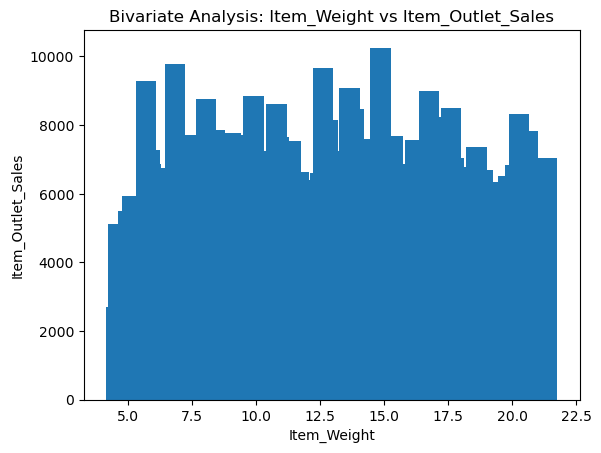

In [33]:
# Create a bar plot
plt.bar(train['Item_Weight'],train['Item_Outlet_Sales'])

# Set the title and labels
plt.title('Bivariate Analysis: Item_Weight vs Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
# Display the plot
plt.show()

Inference:
 From this analysis, we can conclude that weight has some significance with outlet sales.
     

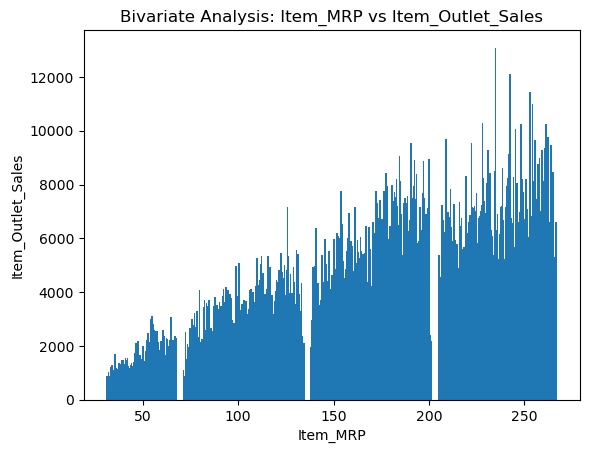

In [34]:
# Create a bar plot
plt.bar(train['Item_MRP'],train['Item_Outlet_Sales'])

# Set the title and labels
plt.title('Bivariate Analysis: Item_MRP vs Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
# Display the plot
plt.show()

inference:
     Here we can see that, Item with high MRP have significant sales

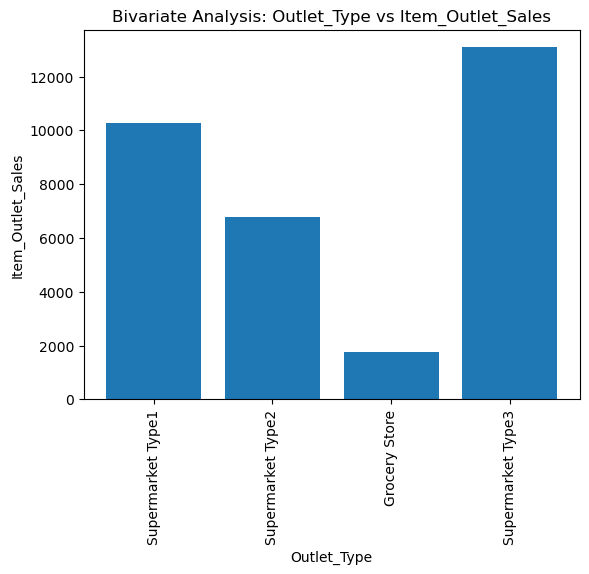

In [35]:
# Create a bar plot
plt.bar(train['Outlet_Type'],train['Item_Outlet_Sales'])

# Set the title and labels
plt.title('Bivariate Analysis: Outlet_Type vs Item_Outlet_Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=90)
# Display the plot
plt.show()

Inference:
     From this we can analyse that, Supermarket type3 have more sales and grocery store have least sales 

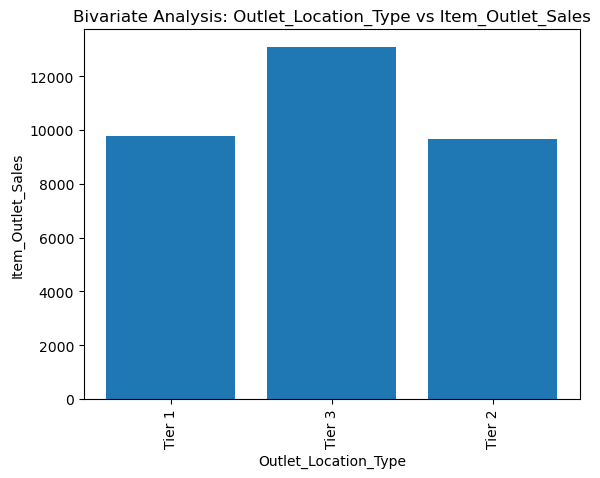

In [36]:
# Create a bar plot
plt.bar(train['Outlet_Location_Type'],train['Item_Outlet_Sales'])
# Set the title and labels
plt.title('Bivariate Analysis: Outlet_Location_Type vs Item_Outlet_Sales')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=90)
# Display the plot
plt.show()

Inference:
       Tier 3 location type outlet have higher va;lue of sales 
       Tier 1 & 2 have similar outlet sales
     

Bivariate Analysis using Scatter Plots

Text(0, 0.5, 'Item_Outlet_Sales')

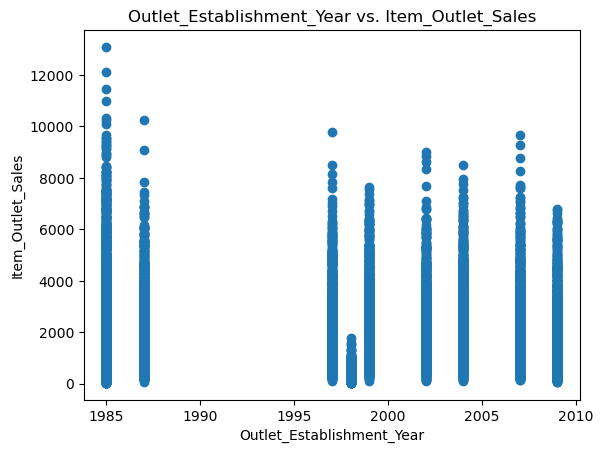

In [37]:
#create scatterplot of hours vs. score
plt.scatter(train.Outlet_Establishment_Year, train.Item_Outlet_Sales)
plt.title('Outlet_Establishment_Year vs. Item_Outlet_Sales')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

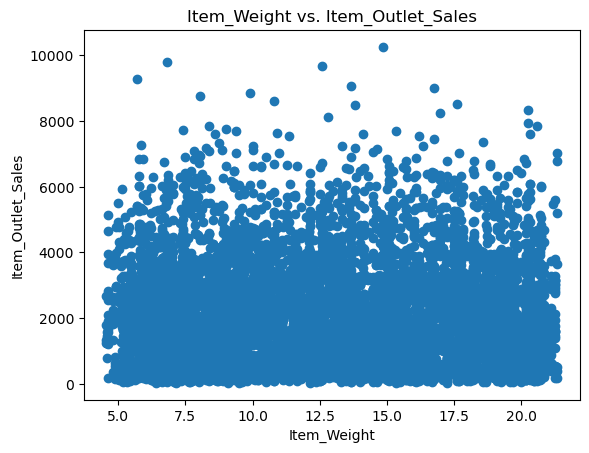

In [38]:
#create scatterplot of hours vs. score
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales)
plt.title('Item_Weight vs. Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

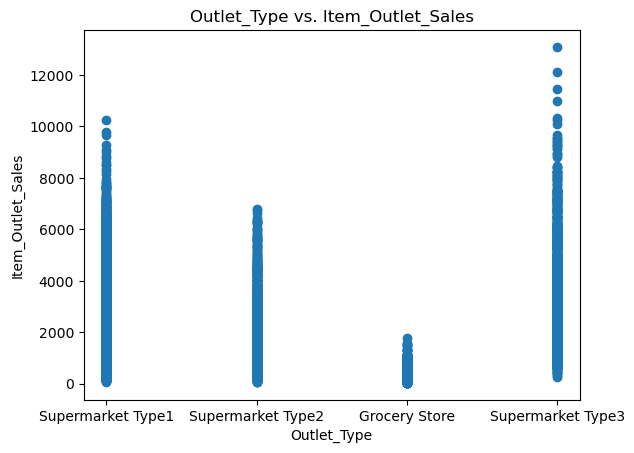

In [39]:
#create scatterplot of hours vs. score
plt.scatter(train.Outlet_Type, train.Item_Outlet_Sales)
plt.title('Outlet_Type vs. Item_Outlet_Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

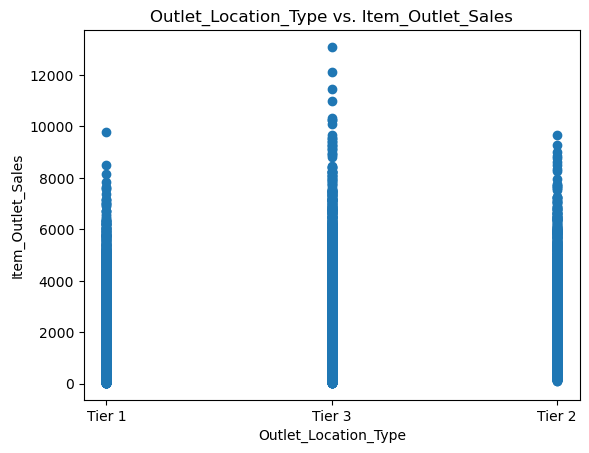

In [40]:
#create scatterplot of hours vs. score
plt.scatter(train.Outlet_Location_Type, train.Item_Outlet_Sales)
plt.title('Outlet_Location_Type vs. Item_Outlet_Sales')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')

# Multivariate Analysis

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


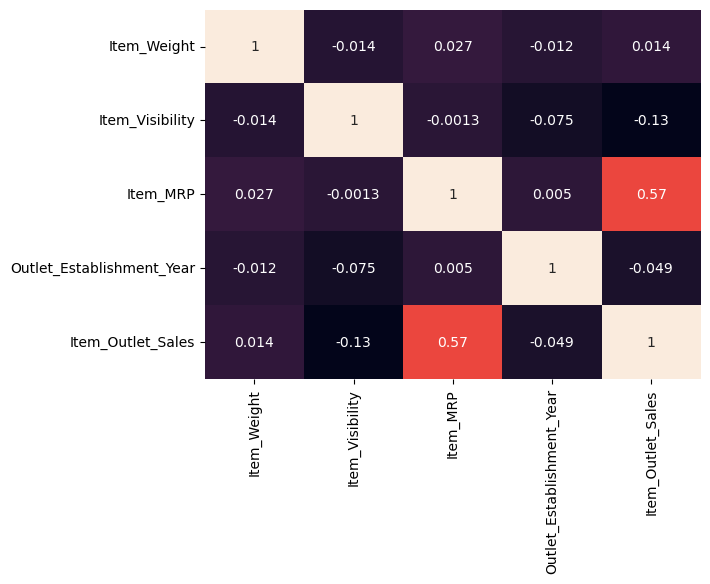

In [41]:
corr=train.corr()
sns.heatmap(corr,annot=True,cbar=False)
corr

Inference:
    from coorelation map, we are checking correlation of features with each other.Here target is Item_Outlet_Sales.
    Here Item_MRP is highly positively correlated with Item_Outlet_Sales.
    Outlet_Establishment_Year,Item_Visibility,Item_Weight are less correlated with Item_Outlet_Sales.
    

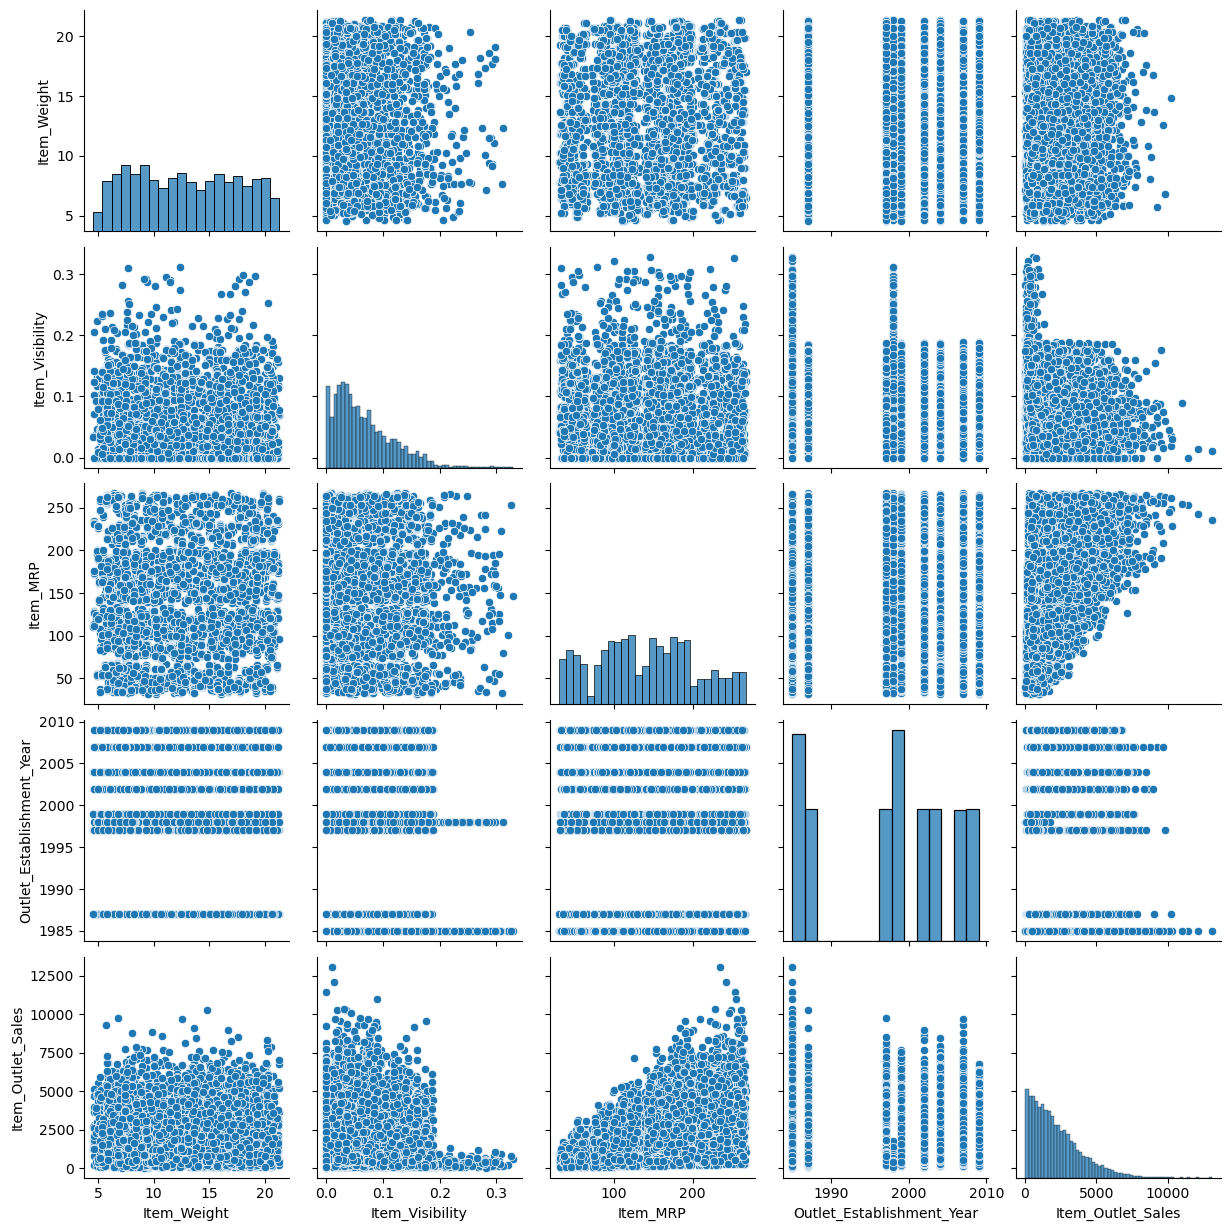

In [42]:
sns.pairplot(train)

# Missing Value Treatment

In this case, both train and test dataset have null values in columns namely Item_Weight & Outlet_Size.we can Simple imputer to impute null values.

In [43]:
from sklearn.impute import SimpleImputer
# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the 'Item_Weight' column in train data
train['Item_Weight'] = imputer.fit_transform(train[['Item_Weight']])

# Transform the 'Item_Weight' column in test data using the trained imputer
test['Item_Weight'] = imputer.transform(test[['Item_Weight']])

# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the 'Outlet_Size' column in train data
train['Outlet_Size'] = imputer.fit_transform(train[['Outlet_Size']])

# Transform the 'Outlet_Size' column in test data using the trained imputer
test['Outlet_Size'] = imputer.transform(test[['Outlet_Size']])

In [44]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [45]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Encoding

Here use both Label and One hot encoding.One hot encoding is done on columns: Item_Fat_Content, Outlet_Location_Type, Outlet_Size to split it to get more meaningful insights,as 

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [48]:
org_data=train.copy()
train["Item_Identifier"]=le.fit_transform(train['Item_Identifier'])
train["Item_Type"]=le.fit_transform(train['Item_Type'])
train["Outlet_Identifier"]=le.fit_transform(train['Outlet_Identifier'])
train["Outlet_Type"]=le.fit_transform(train['Outlet_Type'])

In [49]:
#One Hot Coding:
train = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size'])

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Item_Identifier              8523 non-null   int32  
 1   Item_Weight                  8523 non-null   float64
 2   Item_Visibility              8523 non-null   float64
 3   Item_Type                    8523 non-null   int32  
 4   Item_MRP                     8523 non-null   float64
 5   Outlet_Identifier            8523 non-null   int32  
 6   Outlet_Establishment_Year    8523 non-null   int64  
 7   Outlet_Type                  8523 non-null   int32  
 8   Item_Outlet_Sales            8523 non-null   float64
 9   Item_Fat_Content_LF          8523 non-null   uint8  
 10  Item_Fat_Content_Low Fat     8523 non-null   uint8  
 11  Item_Fat_Content_Regular     8523 non-null   uint8  
 12  Item_Fat_Content_low fat     8523 non-null   uint8  
 13  Item_Fat_Content_r

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [52]:
test["Item_Identifier"]=le.fit_transform(test['Item_Identifier'])
test["Item_Type"]=le.fit_transform(test['Item_Type'])
test["Outlet_Identifier"]=le.fit_transform(test['Outlet_Identifier'])
test["Outlet_Type"]=le.fit_transform(test['Outlet_Type'])

In [53]:
#One Hot Coding:
test = pd.get_dummies(test, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size'])

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Item_Identifier              5681 non-null   int32  
 1   Item_Weight                  5681 non-null   float64
 2   Item_Visibility              5681 non-null   float64
 3   Item_Type                    5681 non-null   int32  
 4   Item_MRP                     5681 non-null   float64
 5   Outlet_Identifier            5681 non-null   int32  
 6   Outlet_Establishment_Year    5681 non-null   int64  
 7   Outlet_Type                  5681 non-null   int32  
 8   Item_Fat_Content_LF          5681 non-null   uint8  
 9   Item_Fat_Content_Low Fat     5681 non-null   uint8  
 10  Item_Fat_Content_Regular     5681 non-null   uint8  
 11  Item_Fat_Content_low fat     5681 non-null   uint8  
 12  Item_Fat_Content_reg         5681 non-null   uint8  
 13  Outlet_Location_Ty

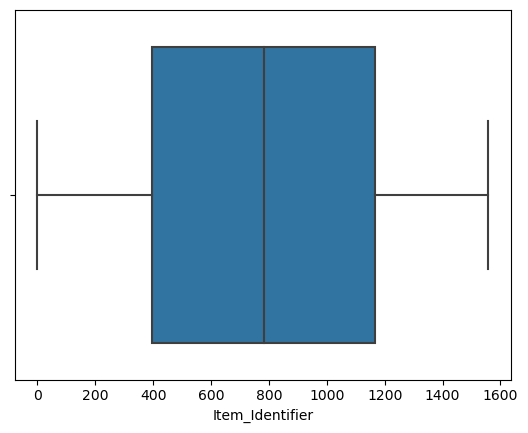

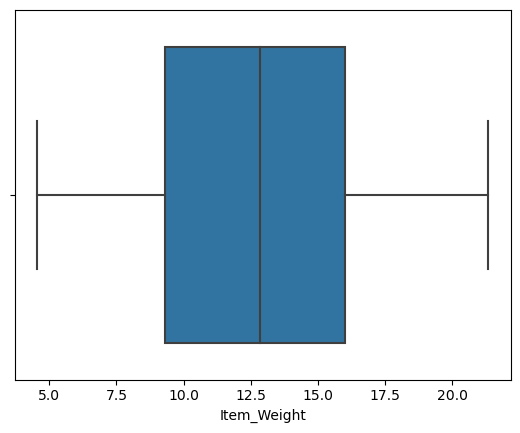

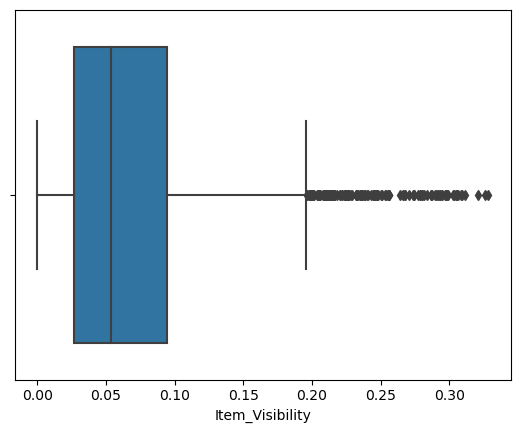

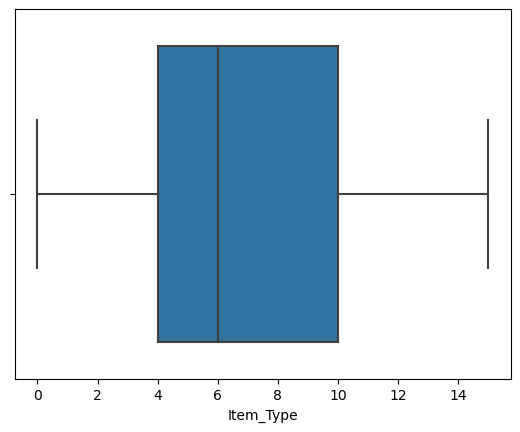

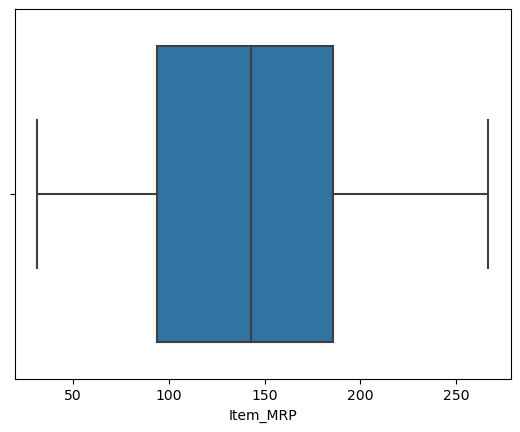

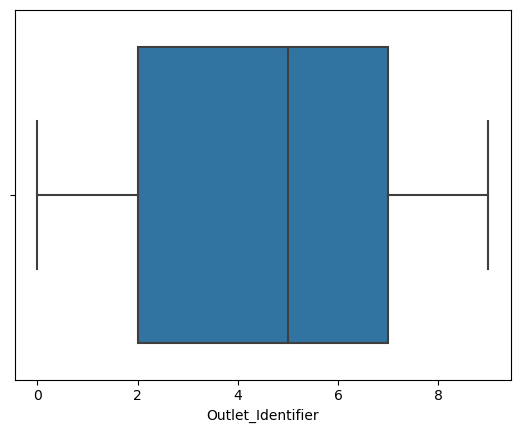

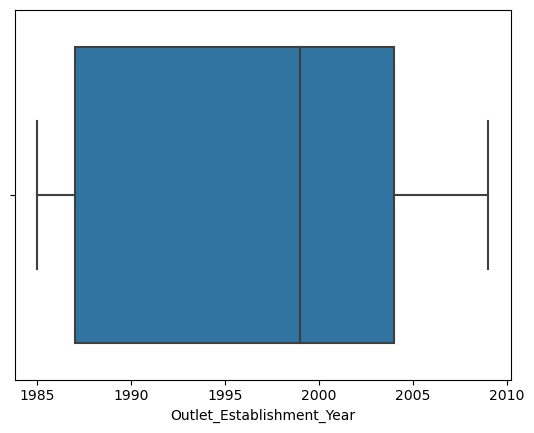

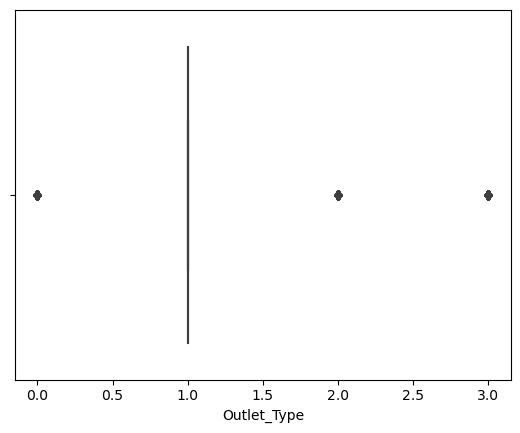

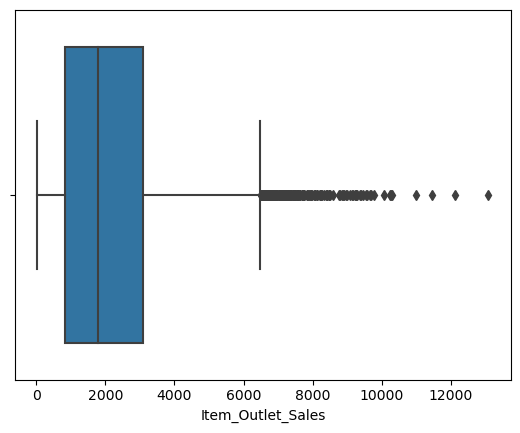

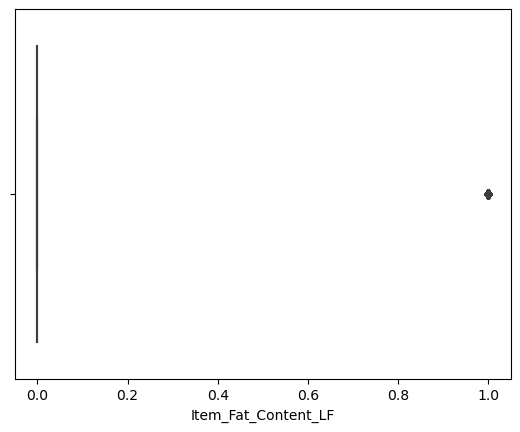

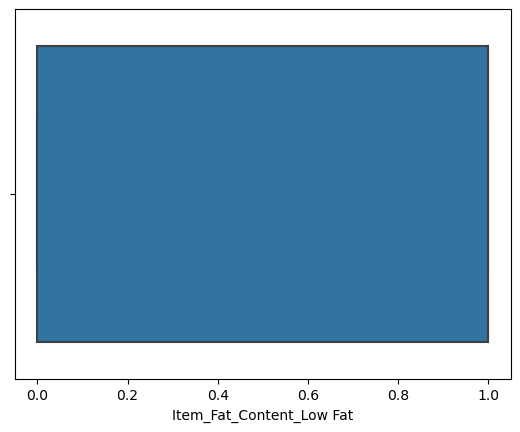

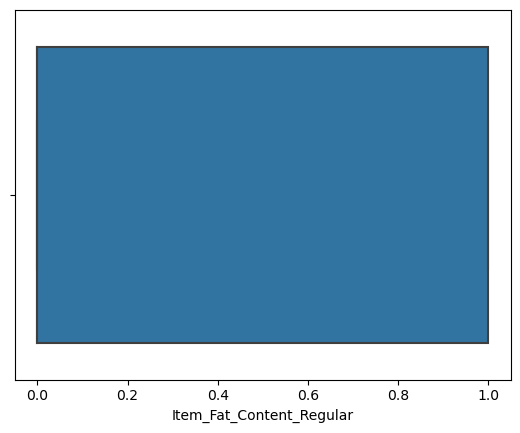

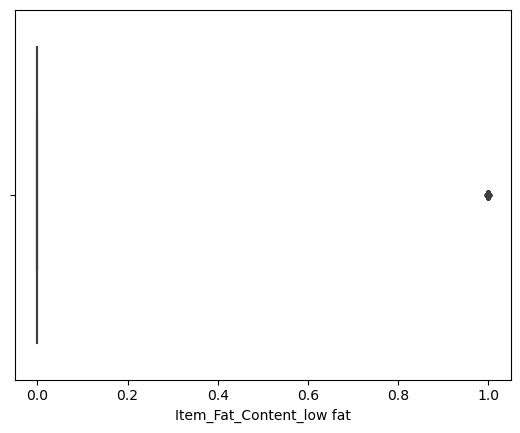

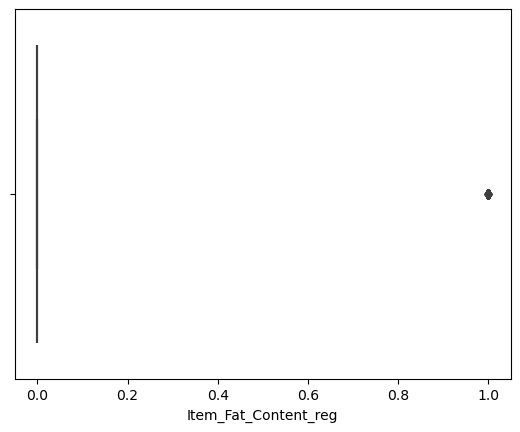

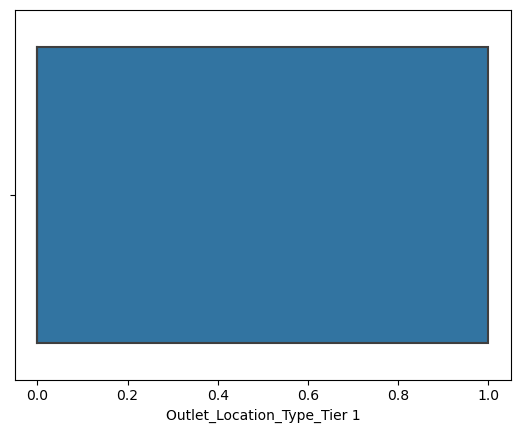

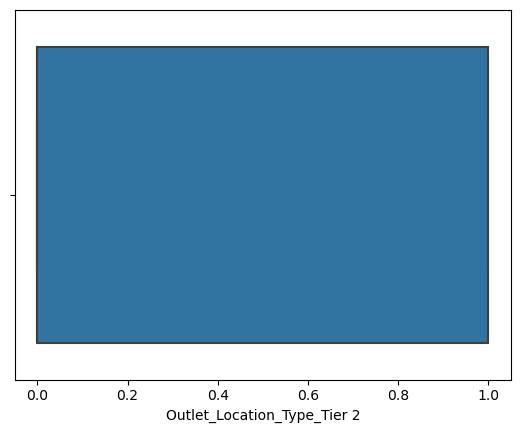

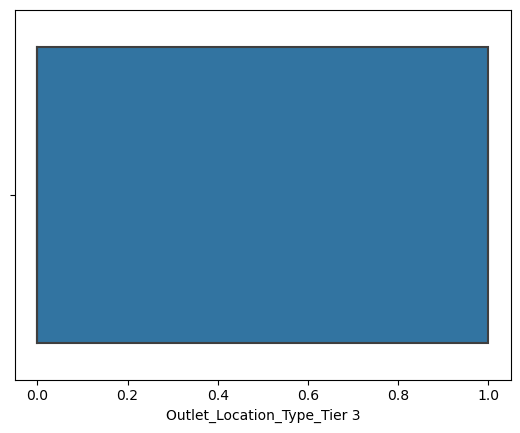

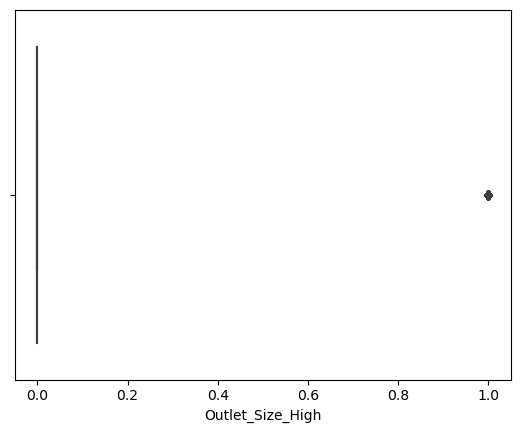

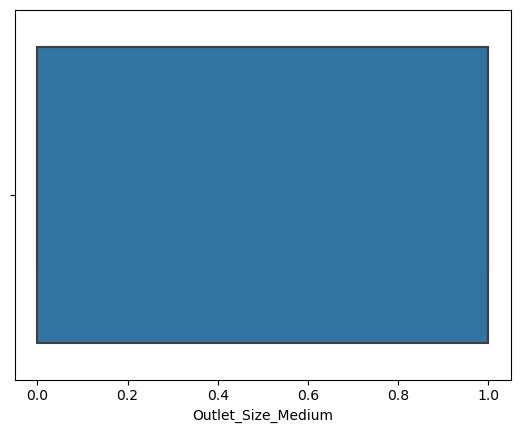

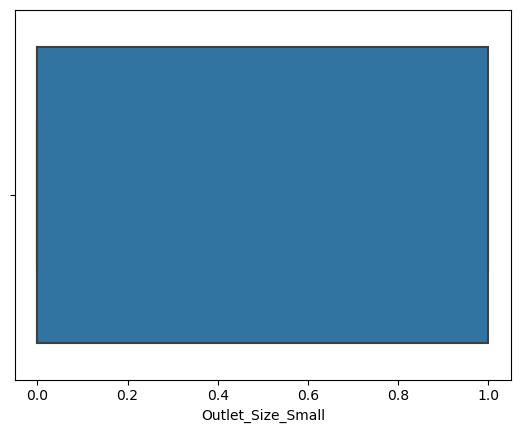

In [55]:
for i in train:
    sns.boxplot(x=train[i])
    plt.show()

Treating Outliers using IQR method

# Feature Engineering

Feature Reduction

From the above analysis some of the feature are less correlated with outlet_sales.They are Item_weight,item_visbility,Outlet_establishment_year,Item_Identifier.So we can drop the columns for furthur processes.

In [56]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,156,9.30,0.016047,4,249.8092,9,1999,1,3735.1380,0,1,0,0,0,1,0,0,0,1,0
1,8,5.92,0.019278,14,48.2692,3,2009,2,443.4228,0,0,1,0,0,0,0,1,0,1,0
2,662,17.50,0.016760,10,141.6180,9,1999,1,2097.2700,0,1,0,0,0,1,0,0,0,1,0
3,1121,19.20,0.000000,6,182.0950,0,1998,0,732.3800,0,0,1,0,0,0,0,1,0,1,0
4,1297,8.93,0.000000,9,53.8614,1,1987,1,994.7052,0,1,0,0,0,0,0,1,1,0,0


In [57]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,156,9.30,0.016047,4,249.8092,9,1999,1,3735.1380,0,1,0,0,0,1,0,0,0,1,0
1,8,5.92,0.019278,14,48.2692,3,2009,2,443.4228,0,0,1,0,0,0,0,1,0,1,0
2,662,17.50,0.016760,10,141.6180,9,1999,1,2097.2700,0,1,0,0,0,1,0,0,0,1,0
3,1121,19.20,0.000000,6,182.0950,0,1998,0,732.3800,0,0,1,0,0,0,0,1,0,1,0
4,1297,8.93,0.000000,9,53.8614,1,1987,1,994.7052,0,1,0,0,0,0,0,1,1,0,0


In [58]:
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,1103,20.750000,0.007565,13,107.8622,9,1999,1,0,1,0,0,0,1,0,0,0,1,0
1,1067,8.300000,0.038428,4,87.3198,2,2007,1,0,0,0,0,1,0,1,0,0,1,0
2,1406,14.600000,0.099575,11,241.7538,0,1998,0,0,1,0,0,0,0,0,1,0,1,0
3,809,7.315000,0.015388,13,155.0340,2,2007,1,0,1,0,0,0,0,1,0,0,1,0
4,1184,12.857645,0.118599,4,234.2300,5,1985,3,0,0,1,0,0,0,0,1,0,1,0


In [59]:
# train data
columns_to_drop = ['Item_Weight', 'Item_Visibility', 'Outlet_Establishment_Year', 'Item_Identifier']
train = train.drop(columns=columns_to_drop)

In [60]:
train.head()

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,4,249.8092,9,1,3735.1380,0,1,0,0,0,1,0,0,0,1,0
1,14,48.2692,3,2,443.4228,0,0,1,0,0,0,0,1,0,1,0
2,10,141.6180,9,1,2097.2700,0,1,0,0,0,1,0,0,0,1,0
3,6,182.0950,0,0,732.3800,0,0,1,0,0,0,0,1,0,1,0
4,9,53.8614,1,1,994.7052,0,1,0,0,0,0,0,1,1,0,0


In [61]:
columns_to_drop = ['Item_Weight', 'Item_Visibility', 'Outlet_Establishment_Year', 'Item_Identifier']
test = test.drop(columns=columns_to_drop)

In [62]:
test.head(50)

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,13,107.8622,9,1,0,1,0,0,0,1,0,0,0,1,0
1,4,87.3198,2,1,0,0,0,0,1,0,1,0,0,1,0
2,11,241.7538,0,0,0,1,0,0,0,0,0,1,0,1,0
3,13,155.0340,2,1,0,1,0,0,0,0,1,0,0,1,0
4,4,234.2300,5,3,0,0,1,0,0,0,0,1,0,1,0
5,6,117.1492,8,1,0,0,1,0,0,1,0,0,0,0,1
6,0,50.1034,3,2,0,0,1,0,0,0,0,1,0,1,0
7,0,81.0592,5,3,0,1,0,0,0,0,0,1,0,1,0
8,13,95.7436,7,1,0,0,1,0,0,0,1,0,0,1,0
9,0,186.8924,2,1,0,1,0,0,0,0,1,0,0,1,0


In [63]:
#target & predict values are assigned to variables y and x respectively

In [64]:
y=train['Item_Outlet_Sales']
x=train.drop(['Item_Outlet_Sales'],axis=1)
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [65]:
#Split the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

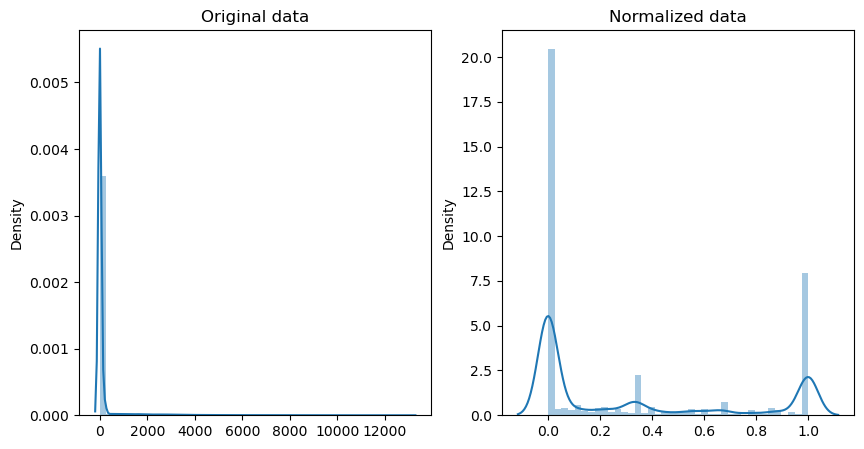

In [66]:
from sklearn.preprocessing import MinMaxScaler
# scale features
scaler = MinMaxScaler()
model=scaler.fit(train)
normalized_data=model.transform(train)
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(train,ax=ax[0])
ax[0].set_title("Original data")
sns.distplot(normalized_data,ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

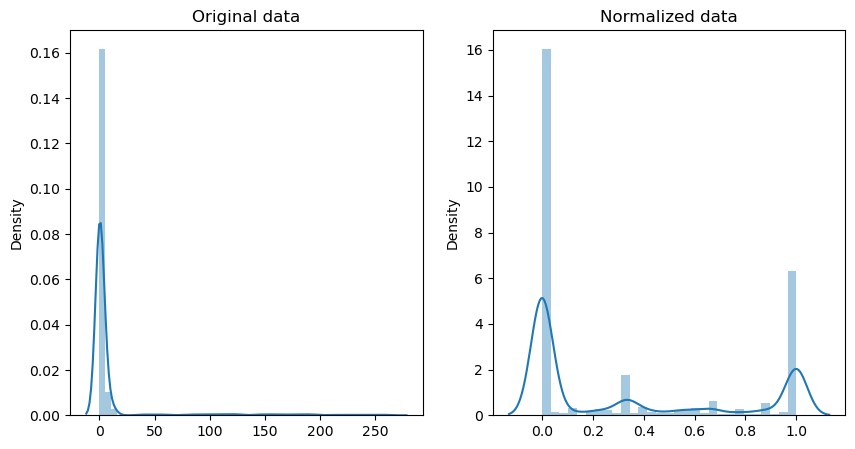

In [67]:
from sklearn.preprocessing import MinMaxScaler
# scale features
scaler = MinMaxScaler()
model=scaler.fit(test)
normalized_data1=model.transform(test)
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(test,ax=ax[0])
ax[0].set_title("Original data")
sns.distplot(normalized_data1,ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

In [68]:
train.shape

(8523, 16)

In [69]:
test.shape

(5681, 15)

In [70]:
X_test = test

# Linear Regression

In [71]:
# Creating instance for the linear model
from sklearn import linear_model
from sklearn import metrics
lr=linear_model.LinearRegression()

In [72]:
# Creating model
model=lr.fit(x_train,y_train)

In [73]:
# Test the model
y_pred=model.predict(x_test)

In [74]:
# import MSE, r^2 to Evaluate the models with MSE & r^2 , print the scores
from sklearn.metrics import mean_squared_error,r2_score
print('RMSE = ',mean_squared_error(y_test,y_pred))
print('r2 score = ',r2_score(y_test,y_pred))

RMSE =  1202593.838595576
r2 score =  0.5575397045882327


In [75]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)
model_lasso=lasso.fit(x_train,y_train)
y_pred_lasso=model_lasso.predict(x_test)
print('r2 score = ',r2_score(y_test,y_pred_lasso))
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

r2 score =  0.5578154978833413
RMSE value is: 1096.286568683069


In [76]:
#Ridge Regression
from sklearn.linear_model import Ridge
rd=Ridge(alpha=5)
model_rd=rd.fit(x_train,y_train)
y_pred_rd=model_rd.predict(x_test)
print('r2 score = ',r2_score(y_test,y_pred_rd))
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_rd)))

r2 score =  0.5576211130344213
RMSE value is: 1096.527506666233


In [77]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model_rf=rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
print('r2 score = ',r2_score(y_test,y_pred_rf))
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

r2 score =  0.5151322318388474
RMSE value is: 1147.979128786438


In [78]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [79]:
#XGBoost Regressor
import xgboost as xgb
# Create an instance of the XGBoost Regressor
xgbr = xgb.XGBRegressor()

# Fit the model on the training data
xgbr.fit(x_train, y_train)

# Make predictions on the test data
y_pred_xb = xgbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xb)
r2 = r2_score(y_test, y_pred_xb)

print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2) Score: ", r2)

Mean Squared Error (MSE):  1263958.7779437834
R-squared (R2) Score:  0.5349622155636411


# Hyperparameter Tuning - Lasso Regression

In [80]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization parameter
    'max_iter': [100, 500, 1000],  # Maximum number of iterations
}

# Create an instance of the Lasso regression model
lasso = Lasso()

# Create an instance of GridSearchCV and perform grid search
grid_search = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_lo = best_model.predict(x_test)

# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred_lo)
print("Best R-squared Score: ", r2)

Best R-squared Score:  0.5578154978833413


# Conclusion

In [81]:
#From the analysis using different regression algorithms, we can conclude that

#Linear regression         r2 score =    0.5575397045882327 
#Lasso Regression          r2 score =    0.5578154978833413
#Ridge Regression          r2 score =    0.5576211130344213
#Random Forest Regressor   r2 score =    0.5164418738807025
#XGBoost Regressor         r2 score =    0.5349622155636411

Here, Lasso Regression model has better r2 score as 0.5578154978833413, so we can use test data for this model also.

In [82]:
y_pred_test = model_lasso.predict(X_test)
y_pred_test

array([1719.83593542, 1338.06621706, 1566.1106863 , ..., 2093.56752654,
       3383.16275724, 1540.65208119])

Conclusions:
After plotting vatious graphs and plotting of heatmap:

The most significant predictors is: Item_MRP

The other significant predictors are: Outlet_Type, Outlet_Size, Outlet_Year.


